In [10]:
import numpy as np
import os
from os.path import join
import matplotlib.pyplot as plt

In [11]:
#A1 - Vilma
#Loading the dataset
data_path = join("D:/Vilma/UNI/3rd. Semester/Methods_3/Assignment_3", "megmag_data.npy")
data = np.load(data_path)

In [12]:
#A1, i - Vilma
#Getting the dimensions of the data
num_repetitions, num_sensors, num_time_samples = data.shape


In [13]:
#A1, ii - Vilma
#Creating time array
start_time = -200 #ms
end_time = 800 #ms
sampling_interval = 4 #ms
times = np.arange(start_time, end_time + 1, sampling_interval)

In [14]:
#A1, ii - Vilma
print("Number of repetitions:", num_repetitions)
print("Number of sensors:", num_sensors)
print("Number of time samples:", num_time_samples)
print("Time array shape:", times.shape)

Number of repetitions: 682
Number of sensors: 102
Number of time samples: 251
Time array shape: (251,)


Covariance matrix shape: (102, 102)


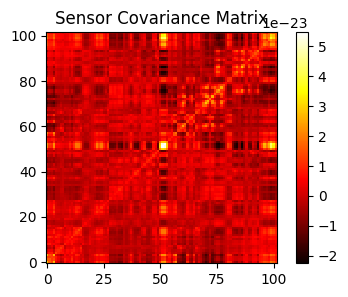

In [15]:
#A1, iii - Vilma

#N, s, t = data.shape # N = repetitions (682), s = sensors (102), t = time (251)

N = data.shape[0]
s = data.shape[1]
t = data.shape[2]

plt.figure(figsize=(5, 3))

cov_matrix_sum = np.zeros((s, s))

# looping through each trial for the repetition
for i in range(N):
    # extracting the data for the i'th trial (sensors, time)
    X = data[i, :,:]  # matrix of shape (102, 251) for trial i
    # covariance matrix for this trial
    cov_matrix_sum += np.dot(X, X.T)  # X * X^T provides a (102, 102) matrix

# averaging the covariance matrix over the trials
cov_matrix = cov_matrix_sum / N

# checking covariance matrix details 
print("Covariance matrix shape:", cov_matrix.shape) 

# plotting the covariance matrix
plt.imshow(cov_matrix, cmap='hot', interpolation='nearest')
plt.gca().invert_yaxis()
plt.title("Sensor Covariance Matrix")
plt.colorbar()
plt.show()  # display the plot



In [16]:
#A1, IV - Vilma

#Checking the shape of the data
print("Original Data Shape:", data.shape)

# Calculating the average over the repetition dimension (axis=0)
average_data = np.mean(data, axis=0)

#Checking the shape of the resulting array
print("Averaged Data Shape:", average_data.shape)

Original Data Shape: (682, 102, 251)
Averaged Data Shape: (102, 251)


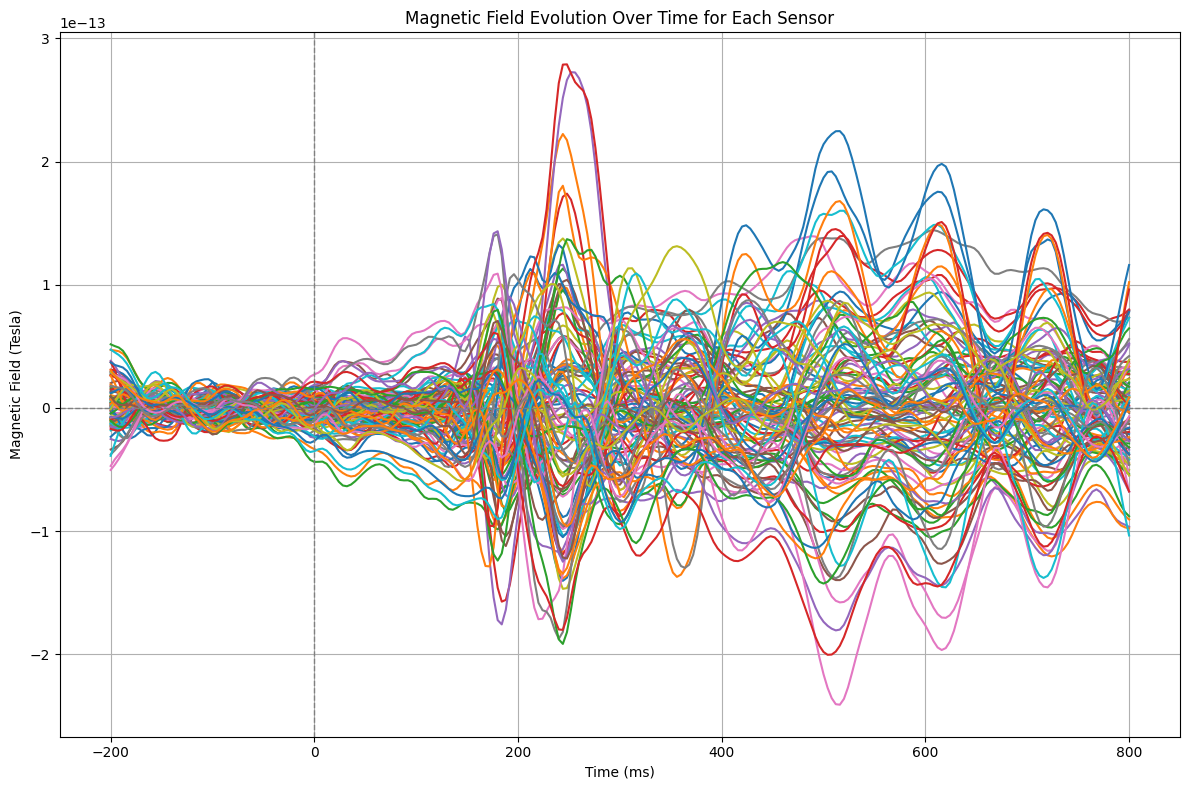

In [17]:
#A1, V - Vilma

# Plotting the magnetic field for each sensor
plt.figure(figsize=(12, 8))

# Iterate over each sensor and plot
for sensor_idx in range(average_data.shape[0]):
    plt.plot(times, average_data[sensor_idx, :], label=f'Sensor {sensor_idx + 1}')

    # Adding horizontal and vertical lines
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.axvline(0, color='gray', linestyle='--', linewidth=1)

# Adding labels and title
plt.title('Magnetic Field Evolution Over Time for Each Sensor')
plt.xlabel('Time (ms)')
plt.ylabel('Magnetic Field (Tesla)')
plt.grid()
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

In [18]:
#A1, VI - Vilma

# Finding the maximal magnetic field in the average data
max_magnetic_field = np.max(average_data)

# Using np.argmax to find the index of the maximum value
max_index = np.argmax(average_data)

# Useing np.unravel_index to find the sensor and time sample corresponding to this index
sensor_idx, time_idx = np.unravel_index(max_index, average_data.shape)

# Printing the results
print("Maximal Magnetic Field:", max_magnetic_field)
print("Sensor Index:", sensor_idx)
print("Time Index:", time_idx)

Maximal Magnetic Field: 2.7886216843591933e-13
Sensor Index: 73
Time Index: 112


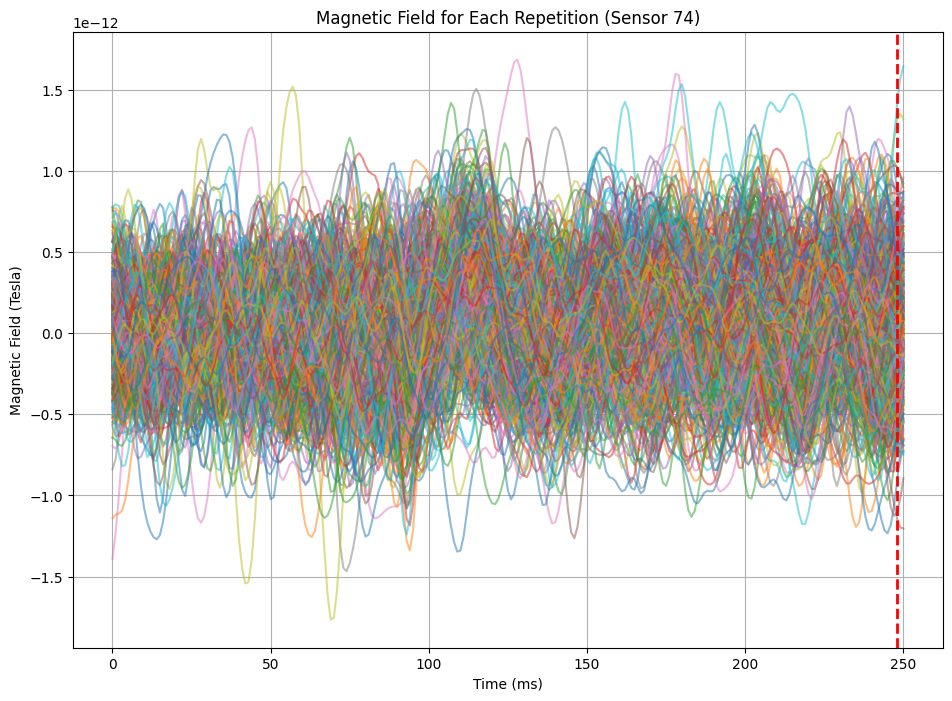

In [19]:
#A1, VII - Vilma

# Plotting the magnetic field for each repetition for the sensor with maximal magnetic field
plt.figure(figsize=(12, 8))

# Plotting each repetition for the sensor that has the maximal magnetic field
for repetition in range(data.shape[0]):
    plt.plot(data[repetition, sensor_idx, :], label=f'Repetition {repetition + 1}', alpha=0.5)

    # Highlight the time point with the maximal magnetic field in the average
time_samples = np.arange(-200, 800 + 1, 4)  # Recreate the time array
plt.axvline(x=time_samples[time_idx], color='red', linestyle='--', linewidth=2, label='Max Field Time Point')


# Add labels and title
plt.title(f'Magnetic Field for Each Repetition (Sensor {sensor_idx + 1})')
plt.xlabel('Time (ms)')
plt.ylabel('Magnetic Field (Tesla)')
plt.grid()

# Adjust layout to make space for the legend
plt.subplots_adjust(right=0.85)  # Adjust if needed

# Show the plot
plt.show()

# A1, Viii - Vilma

The average of the magnetic field response (across repetitions of a visual stimuli) effectively shows the underlying signal while the noise is filtered out in the individual trials. The signal represents consistent patterns of a neural activity which is associated with the stimulus, this could reflect coherent brain responses that align temporally with the stimulus in the presentation. However, each repetition also contains various sources of noise, such as biological variability, measurement of errors, and unrelated brain acrivity, leading to variations in the recprded magnetic fields.

As a result, indivvidual repetitions dispplay a wider range of y-axis values due to both strong signals and significant noise. This shows peaks and lows that may not align with the average trend of the field. 

## Range of values on the Y-axis
The average response typically shows a narrower raneg of values compared to indiviual repetitions, because aveaging tends to limit the extreme variations, leading to a more stable representation of the signal. The individual repetitions however, show a wieder spread in the y-axis values, which might be due to the presence of both strong signals and high leevl of noise. Meaning that some repetitions might both show sharp peaks and lows which doesn't align with the average trend. 